<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-74-jonern/blob/main/semana4/Semana4_Actividad1_Equipo74_A01228409_A01793038.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instituto Tecnológico y de Estudios Superiores de Monterrey**

Maestría en Inteligencia Artificial Aplicada (MNA)

Ciencia y Analítica de Datos

**Jobish Vallikavungal Devassia**

# **Semana 4 - Actividad 1: Transformación y Reducción de datos**

**Ernesto Enriquez Rubio - A01228409**

**Jonathan Garza Bennet - A01793038**

**11 de Octubre del 2022**

[GitHub Link](https://github.com/PosgradoMNA/actividades-del-projecto-equipo-74-jonern/blob/main/semana_4/Semana4_Actividad1_Equipo74_A01228409_A01793038.ipynb)

***Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos***

***Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.***

In [ ]:
# Importar librería de pandas para manejo de DataFrames
import pandas as pd
import numpy as np

**Para utilizar el procedimiento para calular el PCA de nuestro dataset, es importante no tener valores indefinidos o haber hecho una liempeza de datos, por lo que utilizaremos la base de datos de la actividad anterior.**

In [ ]:
# Lectura de base de datos después de la limpieza realizada en el ejercicio anterior
clean_df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-74-jonern/main/semana4/DataSet.csv', index_col=0)
clean_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Descripción de la base de datos:

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

**X1**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

**X2**: Gender (1 = male; 2 = female). 

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

**X4**: Marital status (1 = married; 2 = single; 3 = others). 

**X5**: Age (year). 

**X6 - X11**: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:

**X6** = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;

**X11** = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

**X12-X17**: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .;

**X17** = amount of bill statement in April, 2005. 

**X18-X23**: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [ ]:
# Copiamos el data frame original para no afectar los datos originales
df = clean_df.copy()

#Revisamos el tipo de dato en cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29997 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      29997 non-null  int64  
 1   X2      29997 non-null  float64
 2   X3      29997 non-null  float64
 3   X4      29997 non-null  float64
 4   X5      29997 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29997 non-null  float64
 7   X8      29997 non-null  float64
 8   X9      29997 non-null  float64
 9   X10     29997 non-null  float64
 10  X11     29997 non-null  float64
 11  X12     29997 non-null  float64
 12  X13     29997 non-null  float64
 13  X14     29997 non-null  float64
 14  X15     29997 non-null  float64
 15  X16     29997 non-null  float64
 16  X17     29997 non-null  float64
 17  X18     29997 non-null  float64
 18  X19     29997 non-null  float64
 19  X20     29997 non-null  float64
 20  X21     29997 non-null  float64
 21  X22     29997 non-null  float64
 22

**Como observamos en la info de nuestro dataset, no hay valores indefinidos y todas las variables continen valores numéricos, por lo tanto podemos utilizar las 24 columnas.**

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


**Para empezar el proceso es importante revisar la correlación que existe entre las columnas, por lo que generaremos un mapa de calor utilizando la libreria seaborn.**

In [ ]:
#Librería seaborn para realizar gráficos
import seaborn as sns

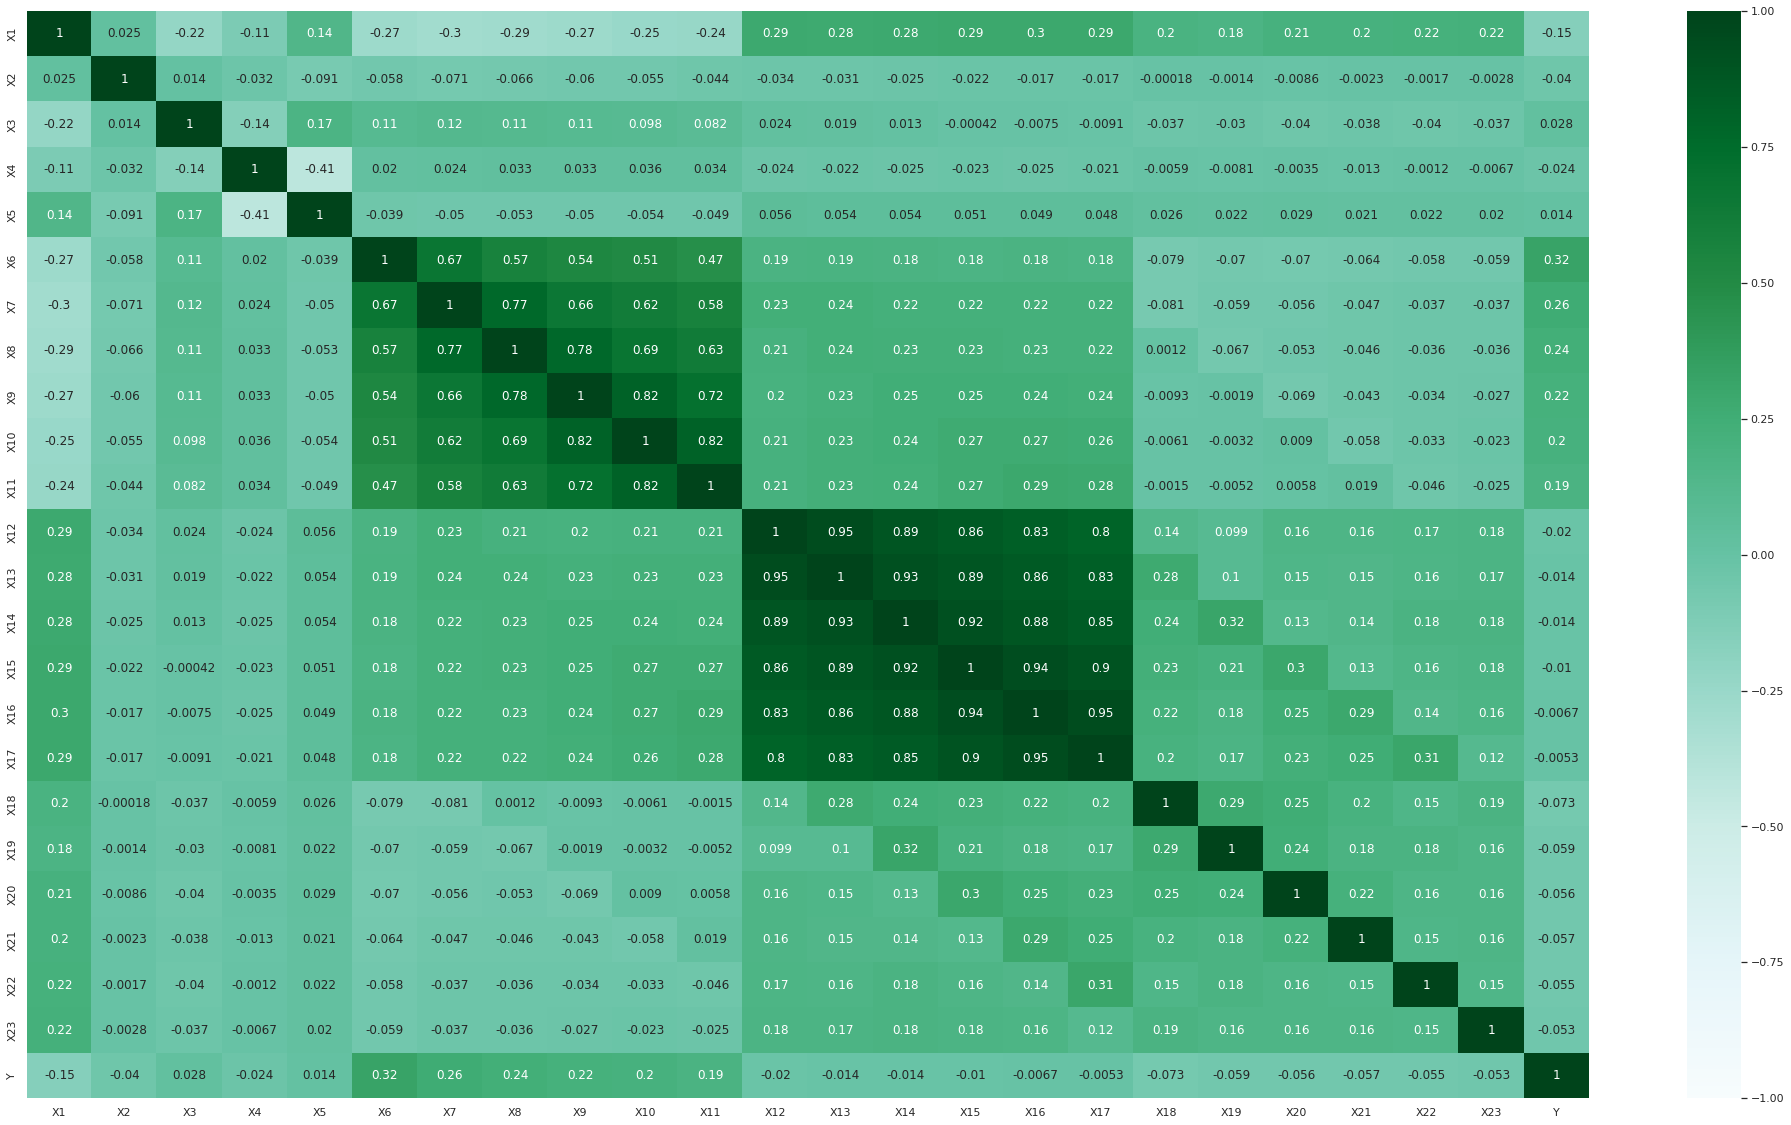

In [ ]:
#Se realiza un ejercio de correlación entre todas las variables
df_corr = df.corr()

#Se construye y despliega un mapa de calor para una visualización más simple
sns.set(rc ={'figure.figsize':(35,20)})
sns.heatmap(df_corr, vmin = -1, vmax = 1, cmap = "BuGn", annot=True)


**Analizando el mapa de calor, podemos observar que los grupos de variables X6-X11 y X12-X17, tienen alta correlación positiva, como era de esperarse debido a que describen lo mismo pero en diferentes meses. Mientras que las variables X4 y X5, estan fuertemente correlacionadas de manera negativa.**

**Revisemos la varianza de los datos, ya que la magnitud de los datos afecta a PCA.**

In [ ]:
#Se realiza un resumen de varianzas y valores máximos y mínimos
summary = {"Varianzas": df.var(),
           "Valor Min": df.min(),
           "Valor Max": df.max()}

#Se crea un dataframe con los resultados
cols_var = pd.DataFrame(summary, index = df.columns)
cols_var

,Varianzas,Valor Min,Valor Max
X1,1.683475e+10,10000.0,1000000.0
X2,2.392348e-01,1.0,2.0
X3,6.249074e-01,0.0,6.0
X4,2.725720e-01,0.0,3.0
X5,8.514632e+01,2.0,79.0
X6,1.262721e+00,-2.0,8.0
X7,1.433020e+00,-2.0,8.0
X8,1.430032e+00,-2.0,8.0
X9,1.366491e+00,-2.0,8.0
X10,1.283666e+00,-2.0,8.0


**Al observar la tabla de las variaciones, podriamos decir que las columnas X2-X11 pasarían desapercibidas porque las otras columnas tienen una varianza muy alta. Para confimar esto revisamos el pocentaje que representan de la varianza total cada columna:**

In [ ]:
# Calculamos la varianza acumulada e individual de los componentes
t = df.var().sum()
pd.DataFrame({
"Porcentaje Varianza": (df.var()/ t) * 100,
"Porcentaje Varianza Acumulado": (df.var().cumsum() / t) * 100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
X1,3.706156e+01,37.061560
X2,5.266734e-10,37.061560
X3,1.375728e-09,37.061560
X4,6.000649e-10,37.061560
X5,1.874489e-07,37.061560
X6,2.779868e-09,37.061560
X7,3.154781e-09,37.061560
X8,3.148204e-09,37.061560
X9,3.008319e-09,37.061560
X10,2.825980e-09,37.061560


**Confirmas lo anteriormente dicho, ya que gran parte de la información esta concentrada en menos de la mitad de las columnas.**

**Por lo tanto, es requerido escalar los datos.**

In [ ]:
# Importamos StandardScalar de de la libreria sklean
from sklearn.preprocessing import StandardScaler

In [ ]:
# Definimos nuestro método para escalar los datos
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Convertimos nuestros datos escalados a un dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,-1.136801,0.810059,0.185682,-1.057360,-1.243945,1.794773,1.782533,-0.696998,-0.666562,-1.53023,...,-0.672708,-0.663324,-0.652902,-0.341910,-0.227128,-0.296799,-0.308135,-0.314194,-0.293412,1.876439
1,-0.366068,0.810059,0.185682,0.858071,-1.027197,-0.875003,1.782533,0.139249,0.188906,0.23504,...,-0.621846,-0.606493,-0.598144,-0.341910,-0.213630,-0.240002,-0.244304,-0.314194,-0.180913,1.876439
2,-0.597288,0.810059,0.185682,0.858071,-0.160207,0.014923,0.111784,0.139249,0.188906,0.23504,...,-0.449940,-0.417448,-0.391809,-0.250257,-0.191930,-0.240002,-0.244304,-0.248742,-0.012165,-0.532924
3,-0.905581,0.810059,0.185682,-1.057360,0.164914,0.014923,0.111784,0.139249,0.188906,0.23504,...,-0.232582,-0.186984,-0.156759,-0.221155,-0.169406,-0.228643,-0.237921,-0.244226,-0.237162,-0.532924
4,-0.905581,-1.234479,0.185682,-1.057360,2.332390,-0.875003,0.111784,-0.696998,0.188906,0.23504,...,-0.347207,-0.348396,-0.331661,-0.221155,1.334924,0.271168,0.266342,-0.269098,-0.255218,-0.532924


**Para comprobar que el escalado de datos fue el correcto, aplicamos nuevamente el cálculo de la varianza.**

In [ ]:
scaled_summary = {"Varianzas": scaled_df.var(),
                  "Valor Min": scaled_df.min(),
                  "Valor Max": scaled_df.max()}

scaled_cols_var = pd.DataFrame(scaled_summary, index = scaled_df.columns)
scaled_cols_var

,Varianzas,Valor Min,Valor Max
X1,1.000033,-1.213874,6.416381
X2,1.000033,-1.234479,0.810059
X3,1.000033,-2.344370,5.245786
X4,1.000033,-2.972792,2.773503
X5,1.000033,-3.628168,4.716614
X6,1.000033,-1.764928,7.134326
X7,1.000033,-1.558964,6.794778
X8,1.000033,-1.533244,6.829221
X9,1.000033,-1.522030,7.032651
X10,1.000033,-1.530230,7.296121


**Podemos notar que la variana es homogenea entre los datos, y ahora revisamos el porjentaje que representan del total.**

In [ ]:
# Calculamos la varianza acumulada e individual por variable
t2 = scaled_df.var().sum()
pd.DataFrame({
"Porcentaje Varianza": (scaled_df.var()/ t2) * 100,
"Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / t2) * 100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
X1,4.166667,4.166667
X2,4.166667,8.333333
X3,4.166667,12.500000
X4,4.166667,16.666667
X5,4.166667,20.833333
X6,4.166667,25.000000
X7,4.166667,29.166667
X8,4.166667,33.333333
X9,4.166667,37.500000
X10,4.166667,41.666667


**Se logró escalar correctamente los datos, ahora podemos aplicar PCA.**

In [ ]:
# Importamos PCA de la libreria sklearn
from sklearn.decomposition import PCA

In [ ]:
# Definimos el metodo de PCA
pcs = PCA()
pcs_transm = pcs.fit_transform(scaled_df)

# Revisamos la varianza que existe en cada componente y la acumulada
pcsSummary_df = pd.DataFrame({
'% varianza individual': np.round(pcs.explained_variance_ratio_,4) * 100,
'% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100
})

pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels

pcsSummary_df


,% varianza individual,% varianza acumulada
PC1,27.30,27.297859
PC2,17.50,44.800848
PC3,6.47,51.272292
PC4,6.15,57.417423
PC5,4.34,61.753273
PC6,4.06,65.814088
PC7,3.82,69.631977
PC8,3.78,73.411526
PC9,3.69,77.104118
PC10,3.63,80.734304


**Se realiza una gráfica Scree con los resultados anteriores**

In [ ]:
#Se importa librería para hacer la gráfica
import matplotlib.pyplot as plt

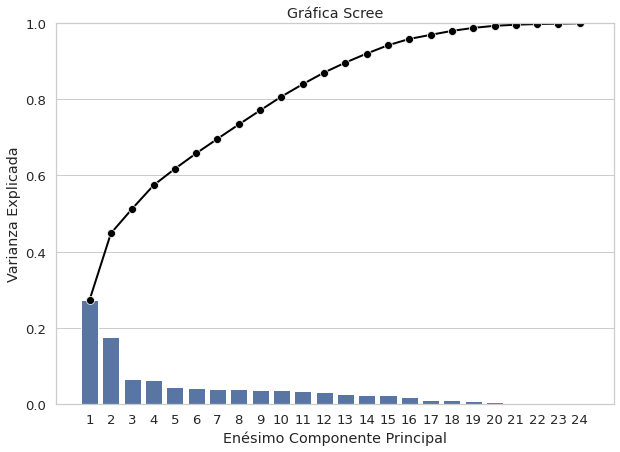

In [ ]:
#Se realiza la gráfica Scree

PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Gráfica Scree')
plt.xlabel('Enésimo Componente Principal')
plt.ylabel('Varianza Explicada')
plt.ylim(0, 1)
plt.show()

**Revisando los datos podemos observar que el 92% de la varianza se alcanza con los 14 primeros componentes, lo cual es suficientemente bueno para generar un buen modelo. Si comparamos esto con los datos escalados, tenemos una reducción notable para alcanzar este porcentaje, ya que de la otra manera se requerian de 22 variables, casi se redujo a la mitad.**

In [ ]:
# Revisamos la relación de cada componente con las variables iniciales
pcs_df = pd.DataFrame(pcs_transm, columns =pcs_labels)

comps_df = pd.DataFrame(
    pcs.components_.round(2), 
    columns = pcs_df.columns,
    index = scaled_df.columns
)
# Imprimimos los componentes de interes PC1-PC14
relevant_pcs = comps_df.iloc[:,:14]
relevant_pcs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
X1,0.07,-0.02,0.02,-0.01,0.01,0.16,0.20,0.20,0.21,0.21,0.21,0.33,0.34,0.35
X2,0.31,0.03,-0.09,-0.04,0.06,-0.30,-0.33,-0.33,-0.33,-0.32,-0.30,0.14,0.14,0.15
X3,0.01,0.03,-0.32,0.47,-0.48,-0.02,0.02,0.06,0.09,0.11,0.11,-0.15,-0.12,-0.08
X4,0.08,-0.08,0.23,-0.43,0.45,0.02,0.05,0.08,0.10,0.11,0.10,-0.17,-0.15,-0.11
X5,-0.20,0.74,0.45,-0.03,-0.14,-0.11,-0.05,-0.00,0.04,0.06,0.06,-0.01,0.01,0.03
X6,-0.27,-0.63,0.39,0.23,0.01,-0.13,-0.06,-0.02,0.01,0.02,0.01,0.01,0.04,0.06
X7,-0.26,0.01,0.41,0.19,-0.14,0.22,0.04,-0.09,-0.20,-0.24,-0.23,0.03,0.03,0.04
X8,0.04,0.07,-0.31,-0.12,0.05,-0.02,-0.08,-0.05,-0.01,0.04,0.08,-0.06,-0.01,0.00
X9,-0.03,-0.05,0.05,0.01,0.01,-0.04,0.01,-0.01,-0.01,0.01,0.09,-0.02,-0.08,-0.14
X10,0.02,0.02,-0.15,-0.06,0.05,-0.03,-0.03,-0.01,0.05,0.06,0.00,-0.06,-0.05,0.08


***Paso 2: Interprete cada componente principal en términos de las variables originales***

***Examine la magnitud y la dirección de los coeficientes de las variables originales.***

***Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.***

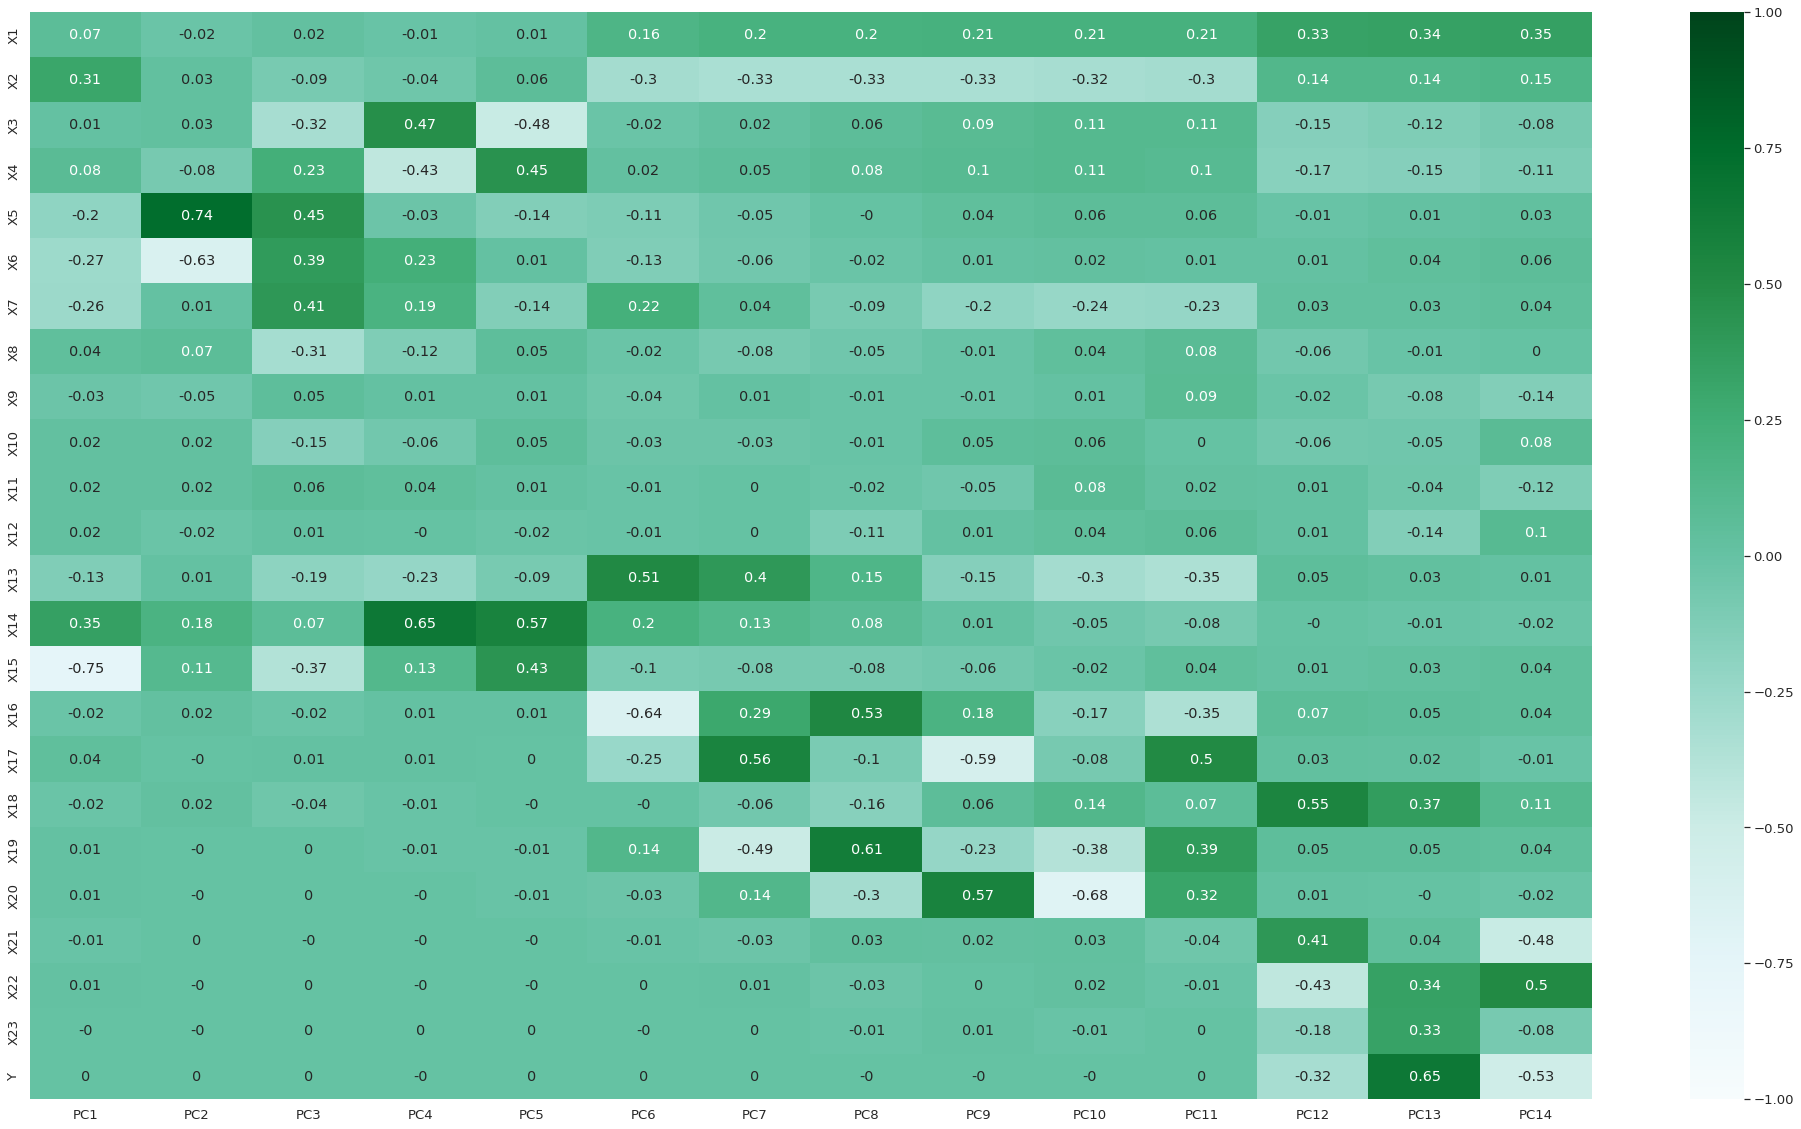

In [ ]:
# Para tener una mejor visualzación creamos un mapa de calor
sns.heatmap(relevant_pcs, vmin = -1, vmax = 1, cmap = "BuGn", annot=True)

**Cabe destacar que a pesar de solo considerar 14 componentes, todas
las variables influyen en los pesos de estos. Por lo tanto comparamos cuantos valores se tenian al principio y con cuantos se podría entrenar el modelo teniendo el 92% de la información inicial.**

In [ ]:
pcs_df_size = relevant_pcs.size
print('PCS Dataframe Size: ', pcs_df_size)
initial_df_size = clean_df.size 
print('Initial Dataframe Size: ', initial_df_size)
diff_btw_dfs = initial_df_size - pcs_df_size
diff_btw_dfs

PCS Dataframe Size:  336
Initial Dataframe Size:  719928


719592

**Es decir, que solo requeririamos de 336 datos para cubrir el 92% de la información inicial, reduciendo de 719,592 a 336 datos es una reducción considerable.**

**Se extraen los parámetros originales donde se encuentra la varianza máxima y mínima para cada componente principal así como sus valores. Estos valores corresponden a las mayores contribuciones a la variaza de cada una de las componentes.**

In [ ]:
#Se extraen las columnas
columnas=relevant_pcs.columns

#Se crea una lista vacía
lista_idx_min_max={}

#Ciclo for para buscar en cada una de las componentes
for column in columnas:

  #Se crea una lista para buscar asignar los valores de la columna
  lista=relevant_pcs[column].values

  #Se busca el valor máximo de la columna
  min_value = relevant_pcs[column].min()

  #Se busca el valor máximo de la columna
  max_value = relevant_pcs[column].max()

  #Se busca la posición del valor mínimo
  index_number_min = np.where(lista == min_value)

  #Se busca la posición del valor máximo
  index_number_max = np.where(lista == max_value)

  #Se obtiene el ínidice del mínimo
  idx_minimo=relevant_pcs.index[index_number_min]

  #Se obtiene el ínidice del máximo
  idx_maximo=relevant_pcs.index[index_number_max]

  #Se agregan los valores al diccionario correspondiente a la columna actual
  lista_idx_min_max[column]=[idx_minimo[0], min_value, idx_maximo[0], max_value]

#Se modifican los valores de los índices para mejor claridad
df_max_min_var=pd.DataFrame(lista_idx_min_max,index=['Min Var Param','Valor Min Var','Max Var Param','Valor Max Var'])

#Se despliega el dataframe correspondiente
df_max_min_var

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Min Var Param,X15,X6,X15,X4,X3,X16,X19,X2,X17,X20,X13,X22,X4,Y
Valor Min Var,-0.75,-0.63,-0.37,-0.43,-0.48,-0.64,-0.49,-0.33,-0.59,-0.68,-0.35,-0.43,-0.15,-0.53
Max Var Param,X14,X5,X5,X14,X14,X13,X17,X19,X20,X1,X17,X18,Y,X22
Valor Max Var,0.35,0.74,0.45,0.65,0.57,0.51,0.56,0.61,0.57,0.21,0.5,0.55,0.65,0.5


***Paso 3: Identifique valores atípicos***

***Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.***

**A continuación, se realizaron gráficos de caja y bigotes para todos los parámetros originales. Todos los puntos que se encuentran fuera de la caja central y los extremos (bigotes), representan valores atípicos.**

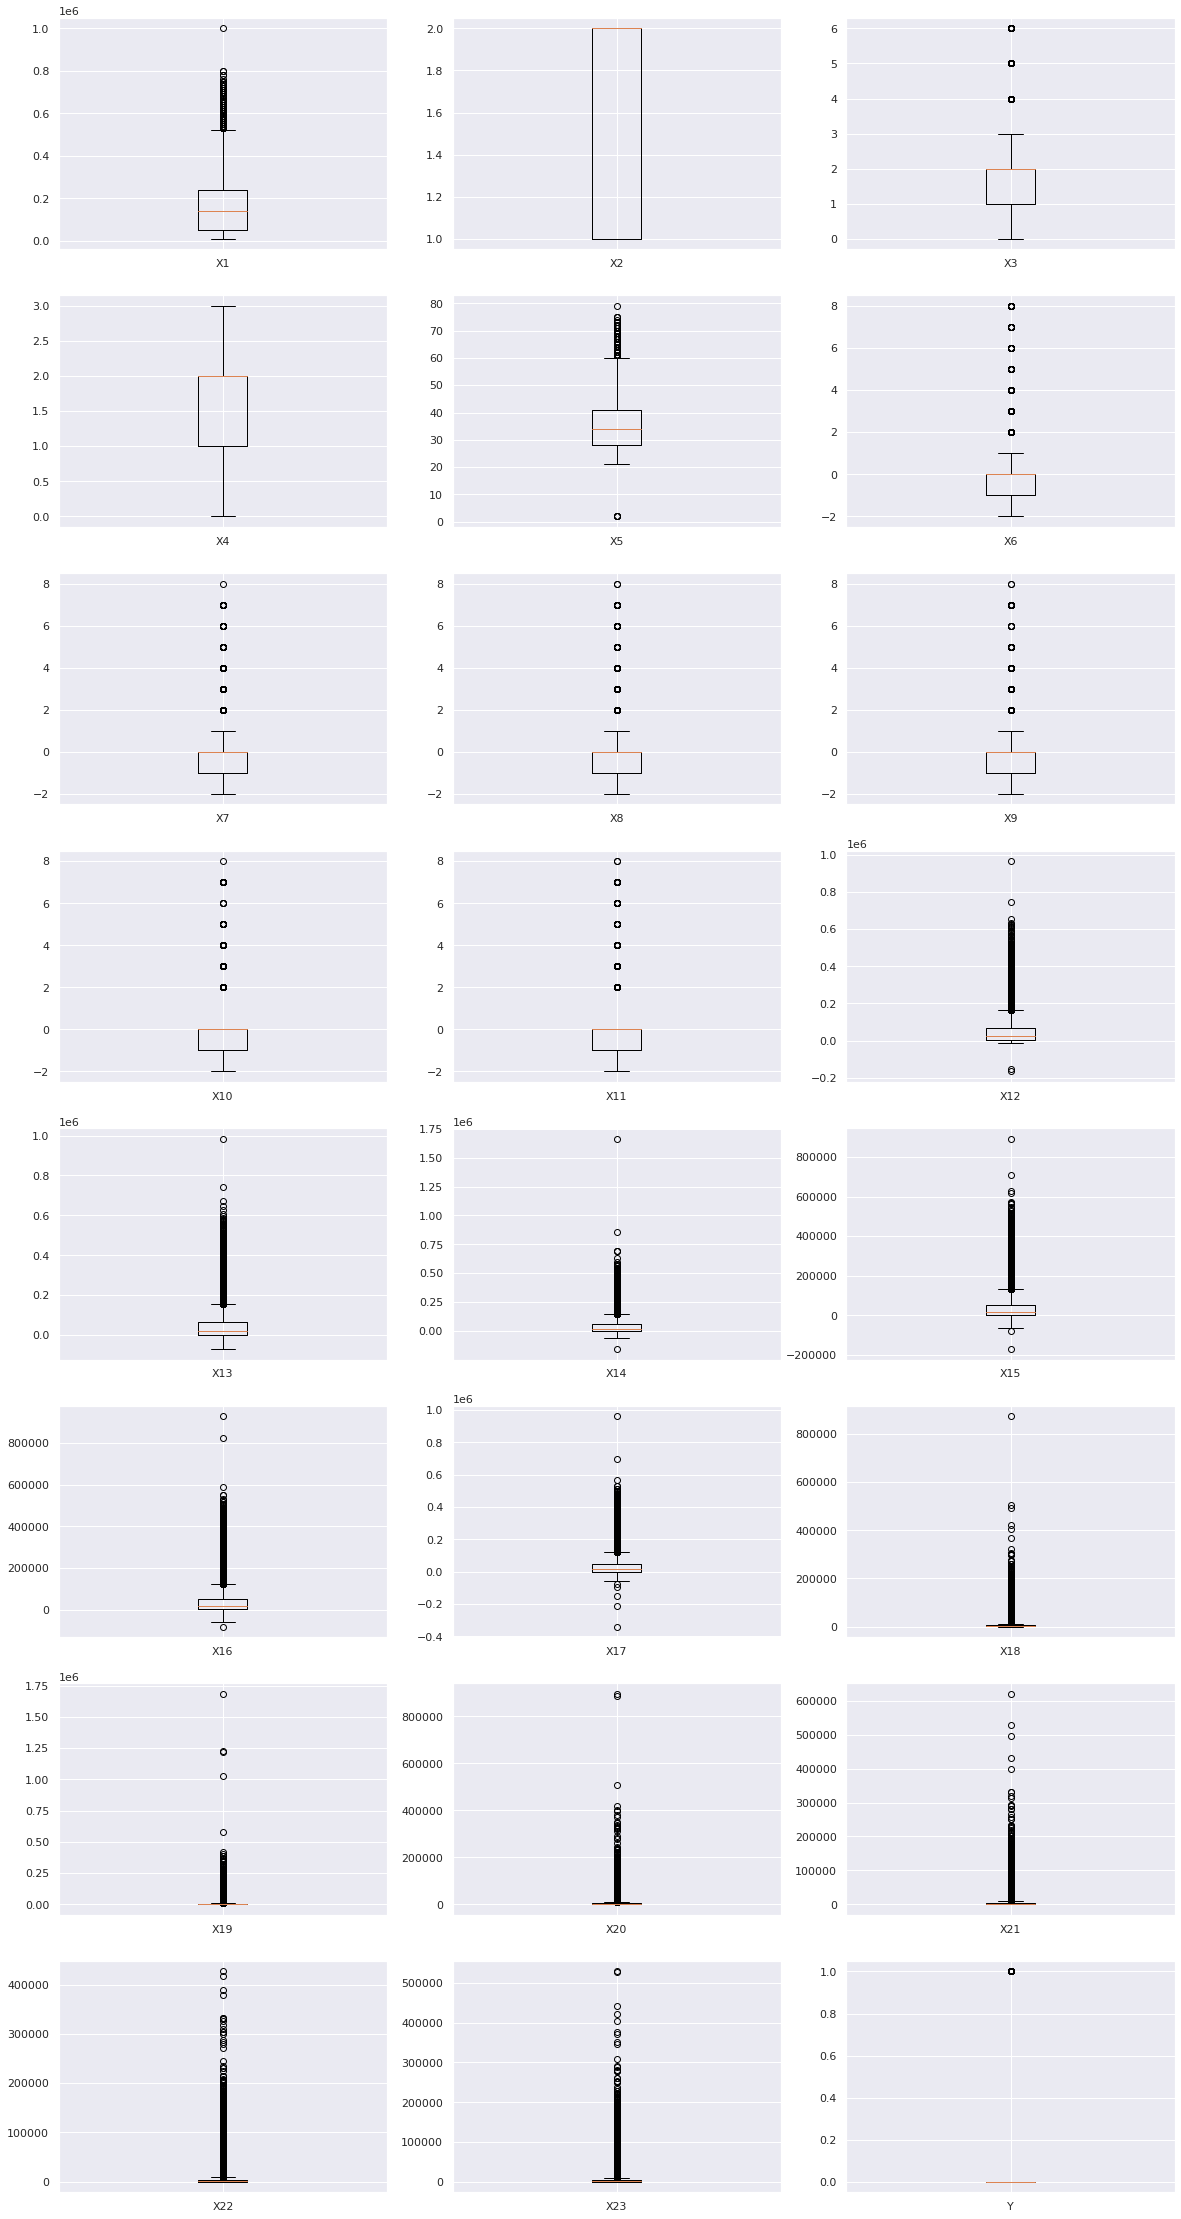

In [ ]:
sns.set(rc={'figure.figsize':(20,40)})
fig, axes = plt.subplots(8, 3)  

columnas = df.columns

for i,columna in enumerate(columnas):

  plt.subplot(8,3,i+1)

  plt.boxplot(df[columna].values)
  plt.xticks([1], [columna])

plt.show()


**Asimismo, se generaron boxplots de los datos escalados para ver si se modifica la presencia de valores atípicos:**

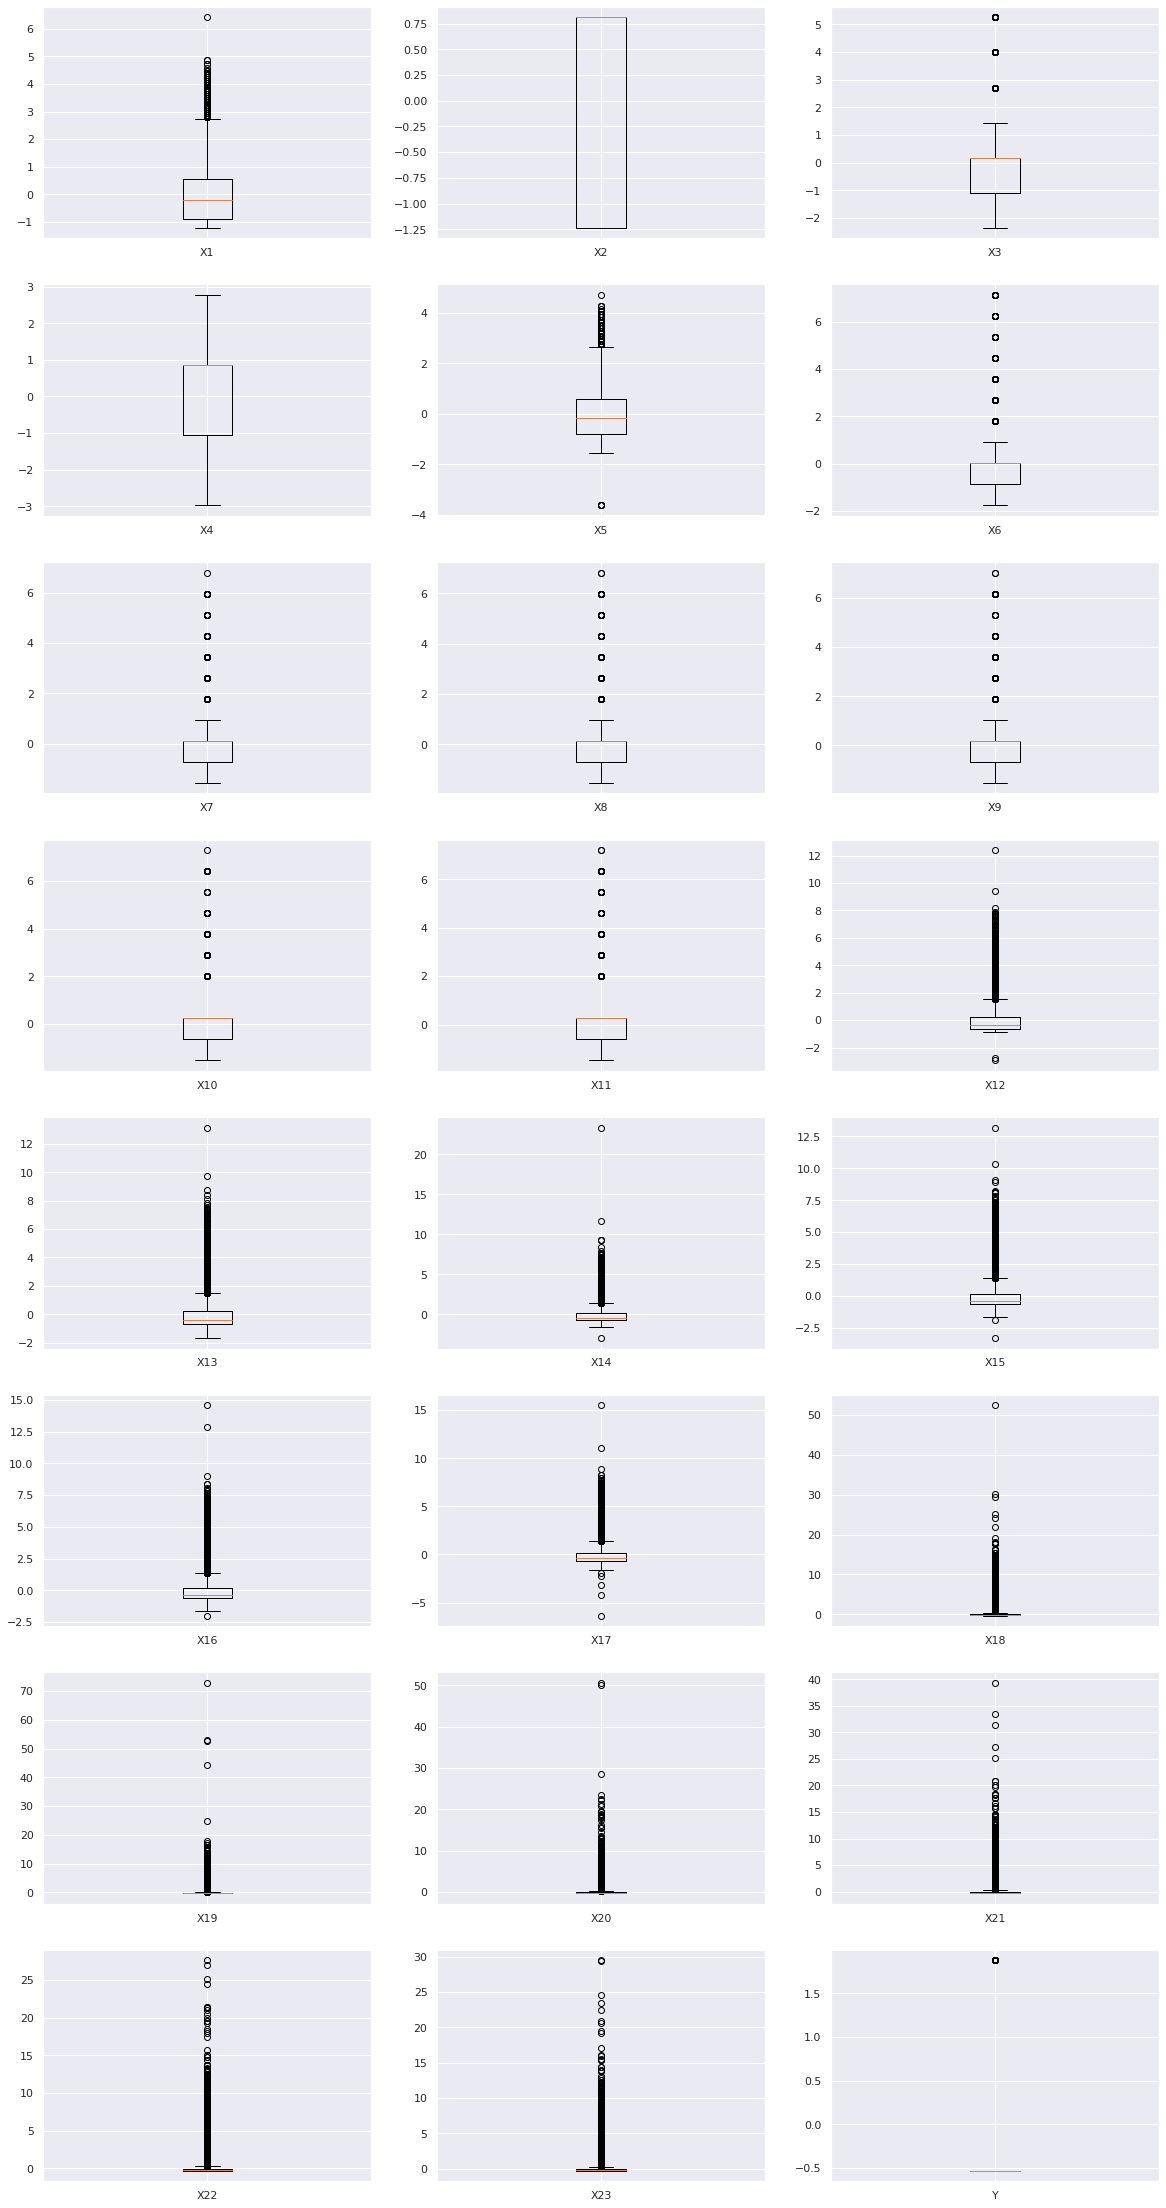

In [ ]:
sns.set(rc={'figure.figsize':(20,40)})
fig, axes = plt.subplots(8, 3)  

columnas = scaled_df.columns

for i,columna in enumerate(columnas):

  plt.subplot(8,3,i+1)

  plt.boxplot(scaled_df[columna].values)
  plt.xticks([1], [columna])

plt.show()

**Se puede observar que la presencia de valores atípicos no se redujo después de este métodp, simplemente se cambio su escala y podemos observar distribuciones muy similares a las originales**

**El siguiente gráfico de caja y bigotes, se realizó sobre el dataframe después de realizar el proceso de PCS. Como vemos en el boxplot, la variación se reduce, los valores no estan muy alejados de la media y se reduce la presencia de valores atípicos. Sin embargo, también hay que considerar cuáles variables tienen pesos más significativos en los PCA y cómo los valores atípicos las pudieran afectar.**

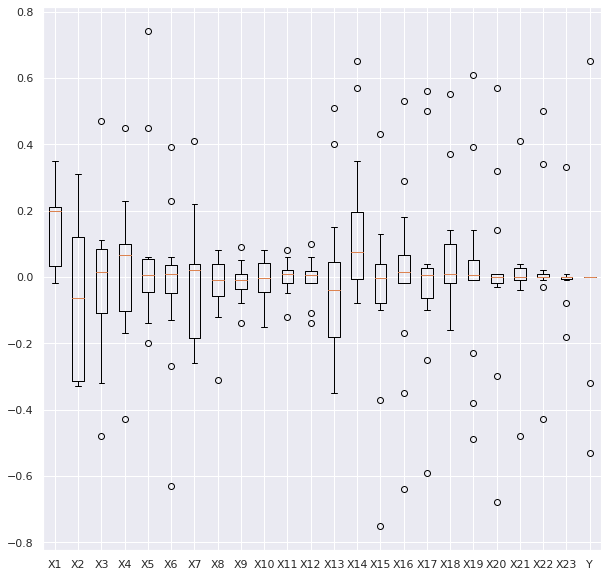

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})

plt.boxplot(relevant_pcs)
plt.xticks([i for i in range(1, len(relevant_pcs)+1)], df.columns)
plt.show()

¿Cuál es el número de componentes mínimo y por qué?

**Considerando que tener una representación mayor a 80% es buena, podriamos decir que tener 10 componentes, sería suficientes. No obstante, si no se lograra tener un modelo preciso, en ese caso recomendariamos 14 elementos que con esto se tendría cubierto 92 de la información inicial.**

¿Cuál es la variación de los datos que representan esos componentes?
**Los 14 elementos representarian el 92% de la variación de los datos.**

¿Cuál es la pérdida de información después de **realizar** PCA?

**Se estarían sustituyendo 719,592 datos, debido a que el dataframe final solo se compondría de 14 columnas y 24 filas, por lo que tendríamos una dataset muy pequeña pero con bastante información. Podemos observar que con 336 datos cubrimos 92% de la información por lo que solo se estaría sacrificando 8%, pero a nivel computacional es una optimización importante.**

De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

**En base a mapa de calor generado con el peso que tienen las variables iniciales con cada componente podemos definir lo siguiente:**

*   **PC1 (30% de la información) -> X15 que es la cantidad factura, tiene un peso negativo significativo. Mientras que las variables de X16 a X23 es muy poco el aporte.**
*   **PC2 (20%  de la información) -> X5 que es la edad tiene un peso notable, mientras que en general todas las otras variables no tienen un impacto significativo.**
*   **PC3 (6% de la información) -> X17 a X23 no representan importancia en este componente, mientras que en general X5, X6 y X7 son las más relevantes.**
*  **PC4 y PC5 (10% de la información) -> las variables con mayor impacto son X14 y X15, otra vez observamos que el total facturado tiene un peso relevante. Mientras que de X16 a X23, no es significante.**
* **PC6 a PC11 (20% de la información) -> las variables con mayor impacto son de X16 a X20, por donde en estos se incluye principalmente los valores que incluyen datos de los pagos anteriores, mientras que los menos significativos estan de X8 a X12 y X21 a X23.**
* **PC12 a PC14 (5% de la información) -> Estos componentes de X21 a X23 y X18, en los cuales son princpalmente datos que representan el historia de pago de los clientes, de X2 a X17 tienen muy poco peso en estos componentes.**

¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

**Para saber principalmente si es adecuado aplicar PCA es importante conocer la correlación de los datos en el dataset, debido a que si existe una fuerte correlación entre ellos, los datos se pueden simplificar por medio de PCA. Además, cuando los dataset son muy grandes y no todas las variables nos aportan información relevante para el problema a resolver, también es óptimo realizar una simplificación por este medio, ocasionando que nuestro modelo sea más rápido de entrenar, podemos decir que estamos ayudando a incrementar la eficiencia por medio de reducir el tiempo de computo requerido y, por lo tanto, obtener resultados muy similares con modelos considerablemente más simples.**

**Referencias**

Kane, F. (2017). Hands-on data science and python machine learning. 

41_dataPreProcessin.pdf. Course Material.

